# Sustainable Aviation Fuel Case Study

## Technologies, data dimensions, and indices

### Technology name.

Seven pathways for sustainable aviation fuel production are modeled, five pathways using a hydroprocessed esters and fatty acids (HEFA) biorefinery with various feedstocks and two pathways using alcohol-to-jet from ethanol. Technology names are:

* HEFA Camelina
* HEFA Castor
* HEFA Jatropha
* HEFA Pennycress
* HEFA Yellow Grease
* ATJ Corn Dry Mill
* ATJ Stover Thermochem

The default scenario is called *State of Technology*. The other scenarios, in increasing order of funding, are *Incremental*, *Moderate*, and *Leap*.

### Dimensions and indices.

1.  Types of capital costs. 
    * For this study all capital costs are treated as one lump sum.
2.  Types of fixed cost. 
    * For this study all fixed (non-input-related) costs are treated as one lump sum.
3.  Inputs to the process. 
    * Feedstock *(feedstock type varies by technology)*
    * Raw Material *(includes all chemical, material, and energy inputs other than feedstock)*
4.  Outputs from the process. Not all technologies produce all outputs.
    * Jet (SAF)
    * Gasoline
    * Diesel
    * Propane
    * Dried distillers' grains and solubles (DDGS)
    * Electricity
5.  Metrics. 
    * Jet GHG (kg CO2eq/gal)
    * Minimum jet selling price (MJSP)
6.  Parameters. 
    * Annual GHG (kg CO2eq)
    * Jet LHV (MJ/gal)
    * Discount Rate (unitless)
    * Depreciation Period (years)
    * Income Tax Rate (unitless)
    * All Capital (USD)
    * All Fixed (USD/year)
    * DDGS (kg/year)
    * Electricity (kWh/year)
    * Diesel (gal/year)
    * Gasoline (gal/year)
    * Propane (gal/year)
    * Jet (gal/year)
    * DDGS Price (USD/kg)
    * Electricity Price (USD/kWh)
    * Diesel Price (USD/gal)
    * Gasoline Price (USD/gal)
    * Propane Price (USD/gal)
    * Feedstock Price (USD/dry metric ton biomass or USD/dry ton oil)
    * Raw Material Price (USD/kg)

Note that in each category, the numeric indices for each item are numbered with integers starting from zero.

See the [model](https://tyche.live/doc-src/formulation.html) and [database](https://tyche.live/doc-src/database.html) documentation for more details.

## Implement the technology model.

The implementation of a technology model consists of a capital cost function, a fixed cost function, a production function, and a metrics function.

See the [model](https://tyche.live/doc-src/formulation.html) documentation for more details.

The [src/technology/](../src/technology/) folder has examples of several technology models.

### Capital cost function.

The capital cost function takes the scale of the operations and the array of technology parameters as arguments and it returns the capital costs for the technology.

Implement the capital cost function for your technology in the file [tutorial/my_technology.py](./).

In [1]:
def capital_cost(scale, parameter):
    """
    Capital cost function.

    Parameters
    ----------
    scale : float
      The scale of operation.
    parameter : array
      The technological parameterization.
    """
    _cap = parameter[5]

    # Stack the costs for each category into a single array that we return.
    return np.stack([_cap
    ])

### Fixed cost function.

The fixed cost function takes the scale of the operations and the array of technology parameters as arguments and it returns the fixed costs for the technology.

Implement the fixed cost function for your technology in the file [tutorial/my_technology.py](./).

In [2]:
def fixed_cost(scale, parameter):
  """
  Fixed cost function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  parameter : array
    The technological parameterization.
  """
  _fix = parameter[6]

  # Stack the costs for each category into a single array that we return.
  return np.stack([_fix
  ])

### Production function.

The production function takes the scale of the operations, the capital costs, the lifetime, the fixed costs, and the array of technology parameters as arguments and it returns the production (outputs) for the technology.

Implement the production function for your technology in the file [tutorial/my_technology.py](./).

In [3]:
def production(scale, capital, lifetime, fixed, input, parameter):
  """
  Production function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  capital : array
    Capital costs.
  lifetime : float
    Technology lifetime.
  fixed : array
    Fixed costs.
  input : array
    Input quantities.
  parameter : array
    The technological parameterization.
  """

  _out = parameter[12]

  # Stack the output for each category into a single array that we return.
  return np.stack([_out
  ])

### Metric function.

The metric function takes information on costs, inputs, outputs, and parameters and it returns the metrics for the technology.

Implement the metrics function for your technology in the file [tutorial/my_technology.py](./).

In [4]:
def metrics(scale, capital, lifetime, fixed, input_raw, input, output_raw, output, cost, parameter):
  """
  Metrics function.

  Parameters
  ----------
  scale : float
    The scale of operation.
  capital : array
    Capital costs.
  lifetime : float
    Technology lifetime.
  fixed : array
    Fixed costs.
  input_raw : array
    Raw input quantities (before losses).
  input : array
    Input quantities.
  output_raw : array
    Raw output quantities (before losses).
  output : array
    Output quantities.
  cost : array
    Costs.
  parameter : array
    The technological parameterization.
  """

  # annual fossil GHG emissions, Units: kg CO2-eq/year
  ghg_foss_ann = parameter[0]

  # jet fuel LHV (MJ/gal)
  lhv = parameter[1]

  # Discount rate, Unitless
  dr = parameter[2]
  # Depreciation period for all equipment except utilities, Units: years
  dp = parameter[3]
  # Income tax rate, Units: years
  tr = parameter[4]
  # total capital cost, Units: USD
  cap = parameter[5]
  # Annual fixed (non-input) costs, Units: USD/year
  fix = parameter[6]

  # co-product amounts
  ddgs = parameter[7]
  elec = parameter[8]
  dsl = parameter[9]
  gas = parameter[10]
  ppn = parameter[11]
  jet = parameter[12]

  # co-product prices
  ddgs_p = parameter[13]
  elec_p = parameter[14]
  dsl_p = parameter[15]
  gas_p = parameter[16]
  ppn_p = parameter[17]

  # input prices
  fd_p = parameter[18]
  mat_p = parameter[19]

  # input amounts
  fd = input_raw[0]
  mat = input_raw[1]

  # equipment lifetime
  els = lifetime[0]

  # FOSSIL GHG: kg CO2-eq/gal SAF
  ghg_foss = ghg_foss_ann / (jet * lhv)

  # MINIMUM FUEL SELLING PRICE: USD/gal SAF

  # total project investment, Units: USD
  tpi = cap

  # depreciation costs, units: USD/year
  dc = cap / dp

  # operating costs, units: USD/year
  oc = fd * fd_p + mat * mat_p + fix

  # tpi discount factor, Units: unitless
  df_tpi = (dr * (1 + dr) ** els) / ((1 + dr) ** els - 1)

  # total revenue from SAF sales, Units: USD/year
  br = ((1 - tr) * oc - tr * dc + df_tpi * tpi) / (1 - tr)

  # revenue from co-product sales, Units: USD/year
  cr = ddgs * ddgs_p + elec * elec_p + dsl * dsl_p + gas * gas_p + ppn * ppn_p

  # MJSP, Units: USD/gal SAF
  mjsp = (br + cr) / output

  # Package results.
  return np.stack([ghg_foss,
                   mjsp
  ])

## Simulate the base case or reference scenario.

Load the data. Compile the production and metric functions for each technology in the dataset. Compute an ensemble of 1000 simulations for the State of Technology (no investment) case.

In [21]:
import os
import sys

sys.path.insert(1, os.path.abspath("../src"))

import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb
import tyche             as ty

saf_loc = "data/saf"

In [22]:
designs = ty.Designs("data/saf")
designs.compile()
saf_sot = designs.evaluate_scenarios(
    sample_count=1000
).xs(
    "State of Technology",
    level = "Scenario",
    drop_level = False
)
saf_sot

Value  \
Technology         Scenario            Sample Variable Index                       
ATJ Corn Dry Mill  State of Technology 1      Cost     Cost         7.803120e+06   
                                              Metric   Jet GHG      7.430631e-02   
                                                       MJSP         8.921173e+00   
                                              Output   DDGS         3.993449e+07   
                                                       Diesel       3.993449e+07   
...                                                                          ...   
HEFA Yellow Grease State of Technology 1000   Output   Diesel       5.154226e+07   
                                                       Electricity  5.154226e+07   
                                                       Gasoline     5.154226e+07   
                                                       Jet          5.154226e+07   
                                                       Propane      5.154226e+07   

                                                                          Units  
Technology         Scenario            Sample Variable Index                     
ATJ Corn Dry Mill  State of Technology 1      Cost     Cost            USD/year  
                                              Metric   Jet GHG      kg CO2eq/MJ  
                                                       MJSP             USD/gal  
                                              Output   DDGS             kg/year  
                                                       Diesel          gal/year  
...                                                                         ...  
HEFA Yellow Grease State of Technology 1000   Output   Diesel          gal/year  
                                                       Electricity     kWh/year  
                                                       Gasoline        gal/year  
                                                       Jet             gal/year  
                                                       Propane         gal/year  

[63000 rows x 2 columns]

Here is a violin plot for the MJSP of jet produced from HEFA Camelina:

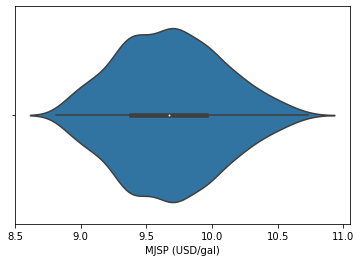

In [23]:
sb.violinplot(
    saf_sot.xs(
        ("HEFA Camelina", "State of Technology", "Metric", "MJSP"),
        level = ("Technology", "Scenario", "Variable", "Index")
    )["Value"]
).set(xlabel = "MJSP (USD/gal)");

And another violin plot for the same metric and the ATJ Corn Dry Mill technology:

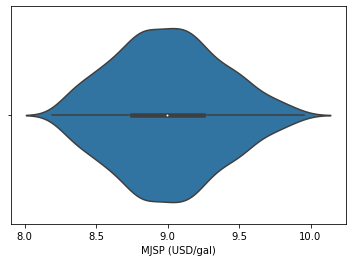

In [24]:
sb.violinplot(
    saf_sot.xs(
        ("ATJ Corn Dry Mill", "State of Technology", "Metric", "MJSP"),
        level = ("Technology", "Scenario", "Variable", "Index")
    )["Value"]
).set(xlabel = "MJSP (USD/gal)");

## Simulate effects of R&D.

### Simulating implications of expert elicitation.

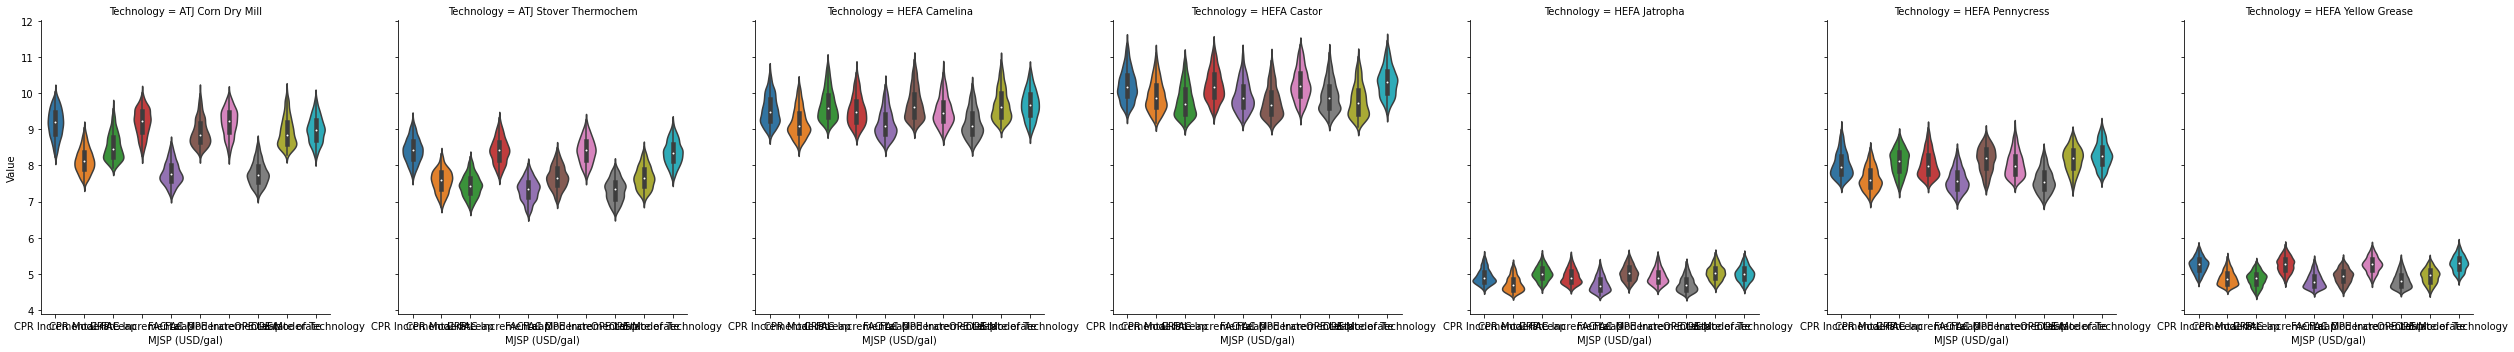

In [25]:
saf_experts = designs.evaluate_scenarios(sample_count=1000)
sb.catplot(
    x = "Scenario",
    y = "Value",
    col ="Technology",
    data = saf_experts.xs(("Metric", "MJSP"),level = ("Variable", "Index")).reset_index(),
    kind="violin",
    split=True).set(xlabel = "MJSP (USD/gal)"); 

## Analyzing investments.

### Simulate the base case or reference scenario.

#### Load the data. Compile the production and metric functions for each technology in the dataset. Simulate the base case.

In [10]:
saf_designs = ty.Designs("data/saf")
saf_investments = ty.Investments("data/saf")
saf_designs.compile()
tranche_results = saf_investments.evaluate_tranches(saf_designs,
                                                    sample_count=500)

Filter down to one technology, since the dataset has seven and the functions aren't written to handle more than one at a time. Then step through and optimize each technology individually for MJSP.

In [11]:
opt_results = []

techs = tranche_results.summary.index.get_level_values('Technology').unique()

for i in techs:
    tranche_tech_results = tranche_results.summary[
        tranche_results.summary.index.get_level_values('Technology') == i
    ]
    evaluator = ty.Evaluator(
        saf_investments.tranches, tranche_tech_results
    )
    optimizer = ty.EpsilonConstraintOptimizer(
        evaluator
    )
    metric_max = optimizer.max_metrics()
    w = optimizer.maximize_slsqp(
        "MJSP",
        total_amount = 10200000
    )
    print(f"{i} - {w[1]}")
    opt_dict = {
        'Technology': i,
        'Optimizer status': w[1],
        'Investment amounts': w[2],
        'Optimum metrics': w[3],
        'Maximum metrics': metric_max
    }
    opt_results.append(
        opt_dict
    )
opt_results

ATJ Corn Dry Mill - Optimization terminated successfully
ATJ Stover Thermochem - Optimization terminated successfully
HEFA Camelina - Optimization terminated successfully
HEFA Castor - Optimization terminated successfully
HEFA Jatropha - Optimization terminated successfully
HEFA Pennycress - Optimization terminated successfully
HEFA Yellow Grease - Optimization terminated successfully


In [19]:
import pdb

In [20]:
milp_results = []

techs = tranche_results.summary.index.get_level_values('Technology').unique()

for i in techs:

    tranche_tech_results = tranche_results.summary[
        tranche_results.summary.index.get_level_values('Technology') == i
    ]
    evaluator = ty.Evaluator(
        saf_investments.tranches,
        tranche_tech_results
    )
    optimizer = ty.EpsilonConstraintOptimizer(
        evaluator
    )
    pdb.set_trace()
    print(f"{i}")
    metric_max = optimizer.max_metrics()
    milp = optimizer.pwlinear_milp(
        "MJSP",
        total_amount = 10200000,
        verbose = 1
    )
    print(f"{milp[1]}")
    opt_dict = {
        'Technology': i,
        'Optimizer status': milp[1],
        'Investment amounts': milp[2],
        'Optimum metrics': milp[3],
        'Maximum metrics': metric_max
    }
    milp_results.append(
        opt_dict
    )

milp_results

> <ipython-input-20-17941cc45688>(18)<module>()
     16     )
     17     pdb.set_trace()
---> 18     print(f"{i}")
     19     metric_max = optimizer.max_metrics()
     20     milp = optimizer.pwlinear_milp(

ipdb> _wide = self.evaluator.evaluate_corners_wide(np.mean).reset_index()
*** NameError: name 'self' is not defined
ipdb> _wide = evaluator.evaluate_corners_wide(statistic).reset_index()
*** NameError: name 'statistic' is not defined
ipdb> _wide = evaluator.evaluate_corners_wide(np.mean).reset_index()
ipdb> _wide
Index  Co-Product Revenue  Fatty Acid Composition  Overall Process Efficiency  \
0                     0.0                     0.0                         0.0   
1                     0.0                     0.0                  15000000.0   
2                     0.0                     0.0                  25000000.0   
3                     0.0                     0.0                  35000000.0   
4                     0.0              20000000.0                     

BdbQuit: 

In [77]:
pwlinear_result[1]

<OptimizationStatus.OPTIMAL: 0>

In [78]:
pwlinear_result[2]

Category
Co-Product Revenue            8000000.0
Fatty Acid Composition              0.0
Overall Process Efficiency          0.0
Name: Amount, dtype: float64

In [79]:
pwlinear_result[3]

Jet GHG    40.87144
MJSP        0.00000
Name: Value, dtype: float64

#### Find the lowest LCOE if only 5M USD can be spent and only 2M USD can be spent in each category.

In [55]:
w = optimizer.maximize_slsqp(
    "MJSP",
    total_amount = 5000000,
    max_amount = pd.Series(
        [2000000, 2000000, 2000000],
        index=["Rotor Investment Only", "Drive Investment Only", "Tower Investment Only"]
    )
)
w[1]

'Optimization terminated successfully'

Investment amounts

In [56]:
w[2]

Category
Co-Product Revenue            0.0
Fatty Acid Composition        0.0
Overall Process Efficiency    0.0
Name: Amount, dtype: float64

Resulting metric.

In [57]:
w[3]

Index
MJSP    167.903639
Name: Value, dtype: float64